## Run data pipeline
Returns an aggegrated df to work with

In [1]:
# Only for Wesley %run "./Data"

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#Copy this cell to every new version of Main
#import dataframe
df_hourly = pd.read_parquet('/home/joelva/code/pgt-group-3/data/raw/Complete_Set/HECTORdataAggregated_Hourly_20240331152619.parquet')

# Print the number of rows
print(f"Number of rows in the file: {len(df_hourly)}")

Number of rows in the file: 2667


## Import utilities
Import custom function

In [4]:
#Copy this cell to every new version of Main
%run "Utilities.ipynb" 

In [5]:
from scipy import stats
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

In [6]:
#Copy this cell to every new version of Main
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
#Copy this cell to every new version of Main
df_hourly.head()

,Vdatetime,datetime,BatSOC,ThrottlePerc,RearAxle1,H2Weight,MotorRPM,MotorTorque,MotorTemp,BattOutputPower,...,TotalPowerDraw,DayOfWeek,AirTemp,Is_Friday,Is_Monday,Is_Saturday,Is_Sunday,Is_Thursday,Is_Tuesday,Is_Wednesday
0,2022-08-01 04,2022-08-01 04:59:59.880000+00:00,87.733572,94.314217,7108.281063,6241.840427,32.226553,251.142921,40.973181,17290.052132,...,13713.046695,Monday,20.6,0,1,0,0,0,0,0
1,2022-08-01 05,2022-08-01 05:59:59.990000+00:00,81.852431,68.168056,8580.659722,6637.344792,10.728542,119.177014,50.915306,15929.268472,...,9444.155245,Monday,20.6,0,1,0,0,0,0,0
2,2022-08-01 06,2022-08-01 06:59:59.870000+00:00,54.056532,98.022640,7776.109452,5644.733940,37.581013,235.988194,56.864547,16360.531741,...,12075.898738,Monday,20.6,0,1,0,0,0,0,0
3,2022-08-01 07,2022-08-01 07:59:59.820000+00:00,46.348187,213.243523,8328.226385,6329.168194,212.520287,445.930969,72.886717,18460.976244,...,40680.984837,Monday,20.6,0,1,0,0,0,0,0
4,2022-08-01 08,2022-08-01 08:59:59.940000+00:00,24.638125,47.125000,3179.993056,2554.907153,28.368542,71.331042,70.815041,-16121.872074,...,5412.054734,Monday,20.6,0,1,0,0,0,0,0


In [35]:
df_hourly

,Vdatetime,datetime,BatSOC,ThrottlePerc,RearAxle1,H2Weight,MotorRPM,MotorTorque,MotorTemp,BattOutputPower,...,TotalPowerDraw,DayOfWeek,AirTemp,Is_Friday,Is_Monday,Is_Saturday,Is_Sunday,Is_Thursday,Is_Tuesday,Is_Wednesday
0,2022-08-01 04,2022-08-01 04:59:59.880000+00:00,87.733572,94.314217,7108.281063,6241.840427,32.226553,251.142921,40.973181,17290.052132,...,13713.046695,Monday,20.6,0,1,0,0,0,0,0
1,2022-08-01 05,2022-08-01 05:59:59.990000+00:00,81.852431,68.168056,8580.659722,6637.344792,10.728542,119.177014,50.915306,15929.268472,...,9444.155245,Monday,20.6,0,1,0,0,0,0,0
2,2022-08-01 06,2022-08-01 06:59:59.870000+00:00,54.056532,98.022640,7776.109452,5644.733940,37.581013,235.988194,56.864547,16360.531741,...,12075.898738,Monday,20.6,0,1,0,0,0,0,0
3,2022-08-01 07,2022-08-01 07:59:59.820000+00:00,46.348187,213.243523,8328.226385,6329.168194,212.520287,445.930969,72.886717,18460.976244,...,40680.984837,Monday,20.6,0,1,0,0,0,0,0
4,2022-08-01 08,2022-08-01 08:59:59.940000+00:00,24.638125,47.125000,3179.993056,2554.907153,28.368542,71.331042,70.815041,-16121.872074,...,5412.054734,Monday,20.6,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2662,2023-04-29 12,2023-04-29 12:59:59.840000+00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,...,0.000000,Saturday,11.4,0,0,1,0,0,0,0
2663,2023-04-29 13,2023-04-29 13:59:59.830000+00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,...,0.000000,Saturday,11.4,0,0,1,0,0,0,0
2664,2023-04-29 14,2023-04-29 14:59:59.840000+00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,...,0.000000,Saturday,11.4,0,0,1,0,0,0,0
2665,2023-04-29 15,2023-04-29 15:59:59.920000+00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,...,0.000000,Saturday,11.4,0,0,1,0,0,0,0


In [36]:
#Copy this cell to every new version of Main
df_hourly.describe


<bound method NDFrame.describe of           Vdatetime                         datetime     BatSOC  ThrottlePerc  \
0     2022-08-01 04 2022-08-01 04:59:59.880000+00:00  87.733572     94.314217   
1     2022-08-01 05 2022-08-01 05:59:59.990000+00:00  81.852431     68.168056   
2     2022-08-01 06 2022-08-01 06:59:59.870000+00:00  54.056532     98.022640   
3     2022-08-01 07 2022-08-01 07:59:59.820000+00:00  46.348187    213.243523   
4     2022-08-01 08 2022-08-01 08:59:59.940000+00:00  24.638125     47.125000   
...             ...                              ...        ...           ...   
2662  2023-04-29 12 2023-04-29 12:59:59.840000+00:00   0.000000      0.000000   
2663  2023-04-29 13 2023-04-29 13:59:59.830000+00:00   0.000000      0.000000   
2664  2023-04-29 14 2023-04-29 14:59:59.840000+00:00   0.000000      0.000000   
2665  2023-04-29 15 2023-04-29 15:59:59.920000+00:00   0.000000      0.000000   
2666  2023-04-29 16 2023-04-29 16:04:35.180000+00:00   0.000000      0.0000

In [37]:
#check min/max values and number of rows
import pandas as pd

min_datetime = df_hourly['Vdatetime'].min()
max_datetime = df_hourly['Vdatetime'].max()

print(f"Minimum datetime: {min_datetime}")
print(f"Maximum datetime: {max_datetime}")

df_hourly.shape
print(df_hourly.shape)

Minimum datetime: 2022-08-01 04
Maximum datetime: 2023-04-29 16
(2667, 23)


In [64]:
#Copy this cell to every new version of Main 
# List data types of each column
dtypes_result = df_hourly.dtypes

# Display descriptive statistics for numerical columns
describe_result = df_hourly.describe()

# Combine both results in one code snippet
combined_result = pd.concat([dtypes_result, describe_result], axis=1, keys=['Data Types', 'Statistics'])

# Display the combined result
print(combined_result)


                              Data Types   Statistics               \
                                       0       BatSOC ThrottlePerc   
Vdatetime                         object          NaN          NaN   
datetime         datetime64[us, Etc/UTC]          NaN          NaN   
BatSOC                           float64          NaN          NaN   
ThrottlePerc                     float64          NaN          NaN   
RearAxle1                        float64          NaN          NaN   
H2Weight                         float64          NaN          NaN   
MotorRPM                         float64          NaN          NaN   
MotorTorque                      float64          NaN          NaN   
MotorTemp                        float64          NaN          NaN   
BattOutputPower                  float64          NaN          NaN   
MotorPowerDraw                   float64          NaN          NaN   
TotalFCPower                     float64          NaN          NaN   
ActualSpeed         

In [39]:
#Copy this cell to every new version of Main
df_hourly_notime = df_hourly.drop(columns=['Vdatetime','datetime'])

(                   BatSOC  ThrottlePerc  RearAxle1  H2Weight  MotorRPM  \
 BatSOC           1.000000     -0.123986  -0.153692 -0.149877 -0.141635   
 ThrottlePerc    -0.123986      1.000000   0.821698  0.742241  0.904431   
 RearAxle1       -0.153692      0.821698   1.000000  0.850038  0.614911   
 H2Weight        -0.149877      0.742241   0.850038  1.000000  0.574161   
 MotorRPM        -0.141635      0.904431   0.614911  0.574161  1.000000   
 MotorTorque     -0.117094      0.971405   0.811191  0.707331  0.887734   
 MotorTemp        0.225863      0.279463   0.106280  0.118007  0.297823   
 BattOutputPower -0.000979      0.479602   0.473667  0.401252  0.384267   
 MotorPowerDraw  -0.137334      0.936735   0.669645  0.602792  0.982881   
 TotalFCPower    -0.109669      0.687373   0.551397  0.517806  0.678086   
 ActualSpeed     -0.141635      0.904431   0.614911  0.574161  1.000000   
 TotalPowerDraw  -0.162970      0.887276   0.686176  0.618396  0.872368   
 AirTemp          0.01006

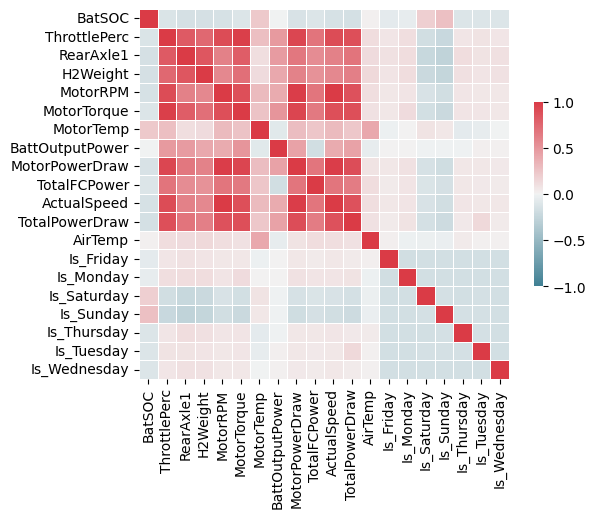

In [40]:
#Copy this cell to every new version of Main
df_hourly_numeric = df_hourly.select_dtypes(include=[np.number])
plot_corr(df_hourly_numeric)


In [65]:
#check which format the dataset is

# Assuming 'data' is the variable containing the dataset

# Check if it's a NumPy array
if isinstance(df_hourly_numeric, np.ndarray):
    print("Data is stored as NumPy array.")
elif isinstance(df_hourly_numeric, pd.DataFrame):
    print("Data is stored as Pandas DataFrame.")
else:
    print("Data format is not recognized.")

Data is stored as Pandas DataFrame.


In [42]:
df_hourly_numeric

,BatSOC,ThrottlePerc,RearAxle1,H2Weight,MotorRPM,MotorTorque,MotorTemp,BattOutputPower,MotorPowerDraw,TotalFCPower,ActualSpeed,TotalPowerDraw,AirTemp,Is_Friday,Is_Monday,Is_Saturday,Is_Sunday,Is_Thursday,Is_Tuesday,Is_Wednesday
0,87.733572,94.314217,7108.281063,6241.840427,32.226553,251.142921,40.973181,17290.052132,8695.370447,-0.051739,5.639647,13713.046695,20.6,0,1,0,0,0,0,0
1,81.852431,68.168056,8580.659722,6637.344792,10.728542,119.177014,50.915306,15929.268472,3729.665322,-0.049446,1.877495,9444.155245,20.6,0,1,0,0,0,0,0
2,54.056532,98.022640,7776.109452,5644.733940,37.581013,235.988194,56.864547,16360.531741,9627.912223,-0.054463,6.576677,12075.898738,20.6,0,1,0,0,0,0,0
3,46.348187,213.243523,8328.226385,6329.168194,212.520287,445.930969,72.886717,18460.976244,40360.854504,27247.517613,37.191050,40680.984837,20.6,0,1,0,0,0,0,0
4,24.638125,47.125000,3179.993056,2554.907153,28.368542,71.331042,70.815041,-16121.872074,4004.707189,25121.991631,4.964495,5412.054734,20.6,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2662,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.059583,0.000000,0.000000,11.4,0,0,1,0,0,0,0
2663,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.060000,0.000000,0.000000,11.4,0,0,1,0,0,0,0
2664,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.060000,0.000000,0.000000,11.4,0,0,1,0,0,0,0
2665,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.060000,0.000000,0.000000,11.4,0,0,1,0,0,0,0


In [43]:
#define the totalpowerdraw feature 
describe_column(df_hourly_numeric,'TotalPowerDraw',100000)

Column: TotalPowerDraw
Minimum value: -16.571758126529186
Maximum value: 65000.0
Number of values per bin (excluding bins with 0 values):
(-16.573, 99983.428]: 2661 values


/tmp/ipykernel_143094/2386358824.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_data = data.groupby('Bin')[column_name].size()


In [44]:
describe_column(df_hourly_numeric,'ActualSpeed',0.1)

Column: ActualSpeed
Minimum value: -0.05926029543419879
Maximum value: 49.97706958843885
Number of values per bin (excluding bins with 0 values):
(-0.0603, 0.0407]: 1869 values
(0.0407, 0.141]: 13 values
(0.141, 0.241]: 7 values
(0.241, 0.341]: 7 values
(0.341, 0.441]: 5 values
(0.641, 0.741]: 1 values
(0.841, 0.941]: 1 values
(0.941, 1.041]: 1 values
(1.041, 1.141]: 2 values
(1.141, 1.241]: 2 values
(1.241, 1.341]: 1 values
(1.341, 1.441]: 6 values
(1.441, 1.541]: 5 values
(1.541, 1.641]: 7 values
(1.641, 1.741]: 4 values
(1.741, 1.841]: 11 values
(1.841, 1.941]: 8 values
(1.941, 2.041]: 8 values
(2.041, 2.141]: 11 values
(2.141, 2.241]: 8 values
(2.241, 2.341]: 8 values
(2.341, 2.441]: 8 values
(2.441, 2.541]: 10 values
(2.541, 2.641]: 13 values
(2.641, 2.741]: 9 values
(2.741, 2.841]: 18 values
(2.841, 2.941]: 7 values
(2.941, 3.041]: 18 values
(3.041, 3.141]: 15 values
(3.141, 3.241]: 11 values
(3.241, 3.341]: 7 values
(3.341, 3.441]: 13 values
(3.441, 3.541]: 7 values
(3.541, 3.64

/tmp/ipykernel_143094/2386358824.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_data = data.groupby('Bin')[column_name].size()


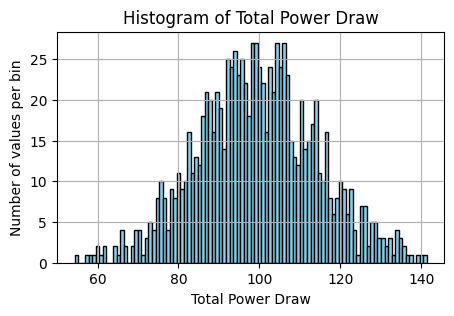

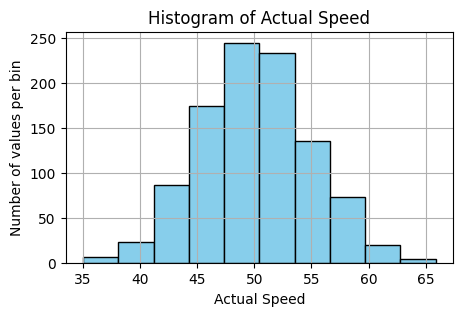

Motor Power Draw Distribution Analysis: {'MotorPowerDraw': {'norm': {'D': 0.029013779100443116, 'p-value': 0.36212023984775}, 'lognorm': {'D': 0.029016309451244227, 'p-value': 0.3620152284535407}, 'expon': {'D': 0.35207039485781355, 'p-value': 2.3743284532103934e-111}, 'gamma': {'D': 0.03216226126393451, 'p-value': 0.24683888260645037}}}
Total Power Draw Distribution Analysis: {'TotalPowerDraw': {'norm': {'D': 0.01903411267034627, 'p-value': 0.8547733408587844}, 'lognorm': {'D': 0.01756571484556879, 'p-value': 0.9117423003473928}, 'expon': {'D': 0.3456502749283126, 'p-value': 3.169895355050558e-107}, 'gamma': {'D': 0.017571879744881946, 'p-value': 0.911531881151916}}}


In [45]:
#check distributions of selected features,  create a temporary dataset df_hourly_numeric
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Assuming df_hourly_numeric is already defined with at least 'TotalPowerDraw', 'ActualSpeed', and 'MotorPowerDraw' columns
# For demonstration, let's create a dummy df_hourly_numeric with random data for 'TotalPowerDraw' and 'ActualSpeed'
np.random.seed(0)
df_hourly_numeric_dum = {
    'TotalPowerDraw': np.random.normal(loc=100, scale=15, size=1000),
    'ActualSpeed': np.random.normal(loc=50, scale=5, size=1000),
    'MotorPowerDraw': np.random.normal(loc=120, scale=20, size=1000)  # Adding 'MotorPowerDraw'
}

# Plot histograms
def plot_histograms(data):
    plt.figure(figsize=(5, 3))
    plt.hist(data['TotalPowerDraw'], bins=100, color='skyblue', edgecolor='black')
    plt.title('Histogram of Total Power Draw')
    plt.xlabel('Total Power Draw')
    plt.ylabel('Number of values per bin')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(5, 3))
    plt.hist(data['ActualSpeed'], bins=10, color='skyblue', edgecolor='black')
    plt.title('Histogram of Actual Speed')
    plt.xlabel('Actual Speed')
    plt.ylabel('Number of values per bin')
    plt.grid(True)
    plt.show()

# Function to analyze distributions
def analyze_distributions(data, columns, distributions):
    results = {}
    for column in columns:
        col_data = data[column]
        results[column] = {}
        for distribution in distributions:
            params = distribution.fit(col_data)
            D, p_value = stats.kstest(col_data, distribution.name, args=params)
            results[column][distribution.name] = {'D': D, 'p-value': p_value}
    return results

# Plot histograms
plot_histograms(df_hourly_numeric_dum)

# Analyze distributions for 'MotorPowerDraw' and 'TotalPowerDraw'
results_motor_power_draw = analyze_distributions(df_hourly_numeric_dum, ['MotorPowerDraw'], [stats.norm, stats.lognorm, stats.expon, stats.gamma])
results_total_power_draw = analyze_distributions(df_hourly_numeric_dum, ['TotalPowerDraw'], [stats.norm, stats.lognorm, stats.expon, stats.gamma])

print("Motor Power Draw Distribution Analysis:", results_motor_power_draw)
print("Total Power Draw Distribution Analysis:", results_total_power_draw)

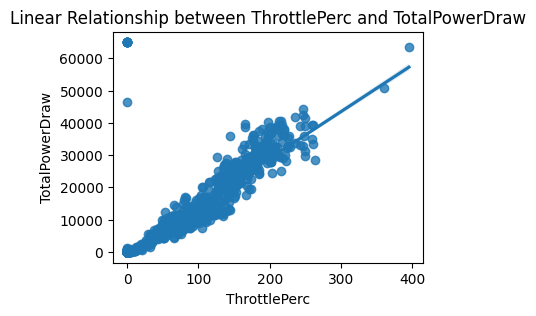

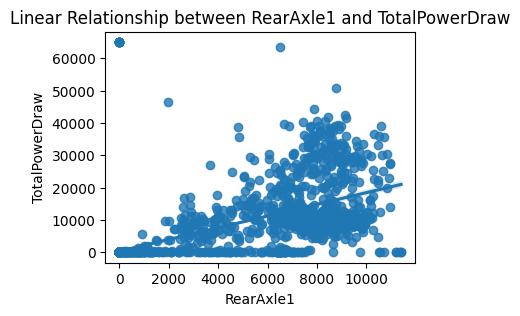

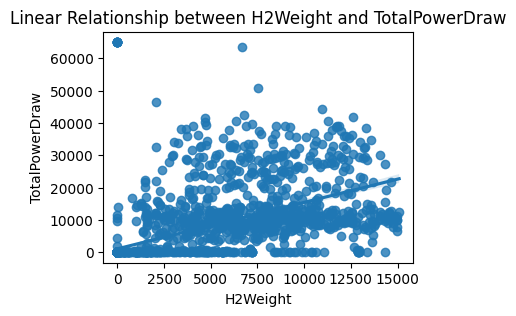

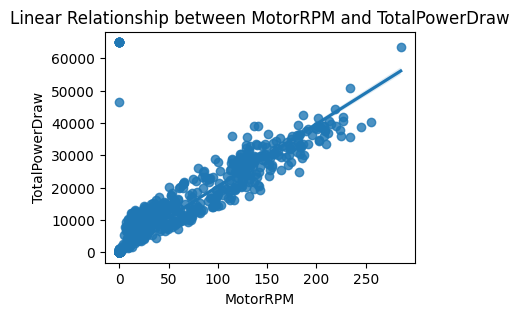

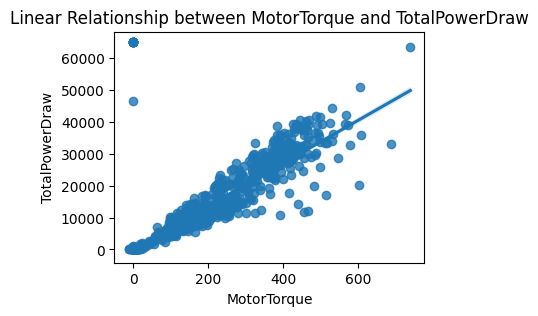

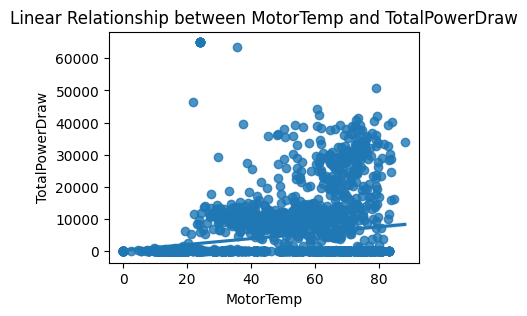

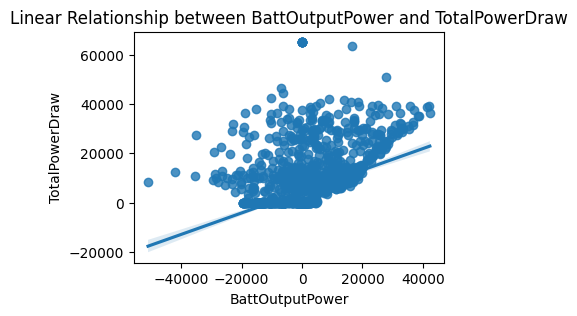

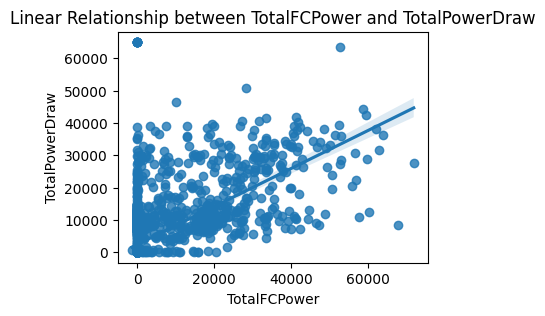

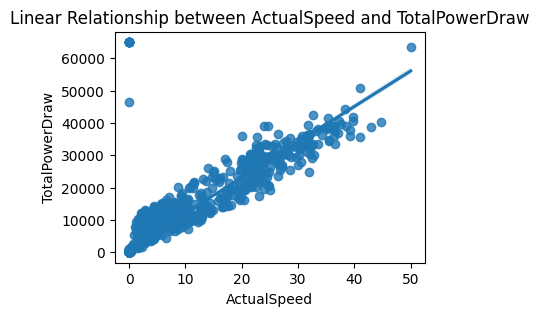

Plotting the linear relationship between Throttle Percentage and Total Power Draw...


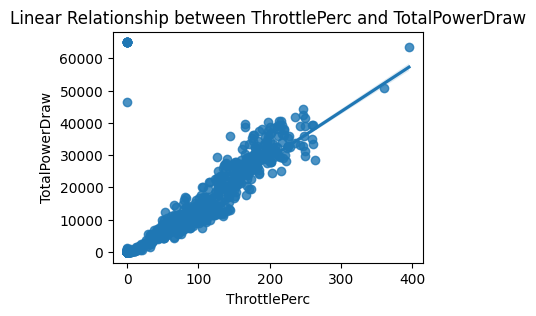

Plotting the linear relationship between Rear Axle 1 Load and TotalPowerDraw...


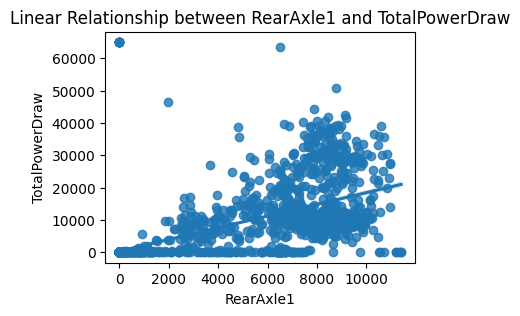

Plotting the linear relationship between Throttle Percentage and TotalPowerDraw...


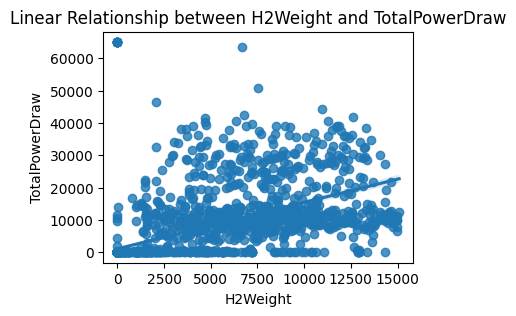

Plotting the linear relationship between Rear Axle 1 Load and TotalPowerDraw...


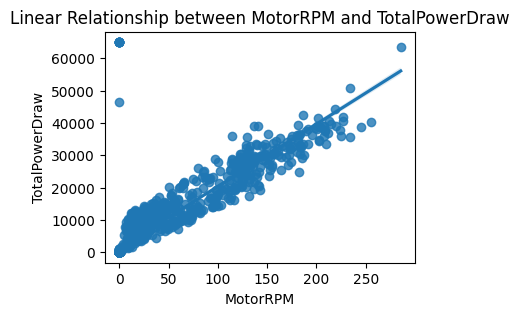

Plotting the linear relationship between Throttle Percentage and TotalPowerDraw...


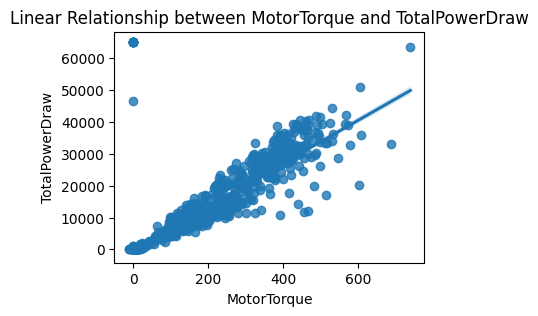

Plotting the linear relationship between Rear Axle 1 Load and TotalPowerDraw...


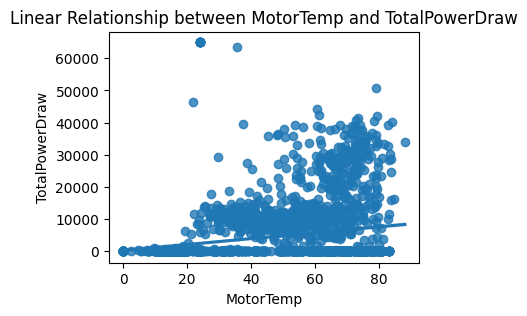

Plotting the linear relationship between Throttle Percentage and TotalPowerDraw..


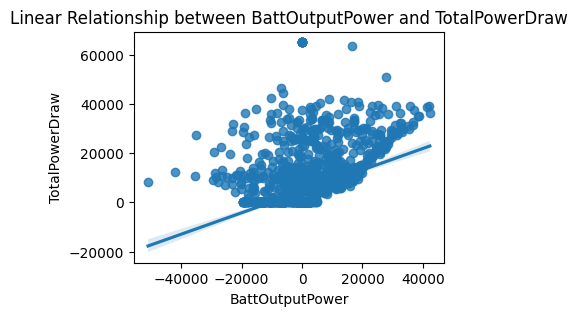

Plotting the linear relationship between Rear Axle 1 Load and TotalPowerDraw...


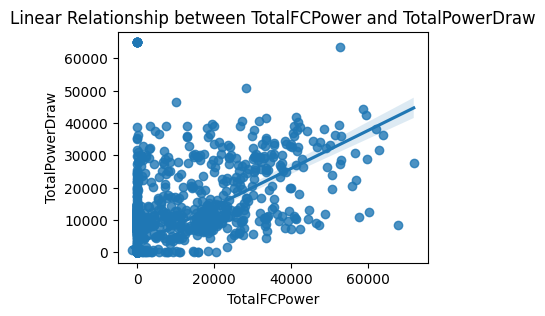

Plotting the linear relationship between Rear Axle 1 Load and TotalPowerDraw...


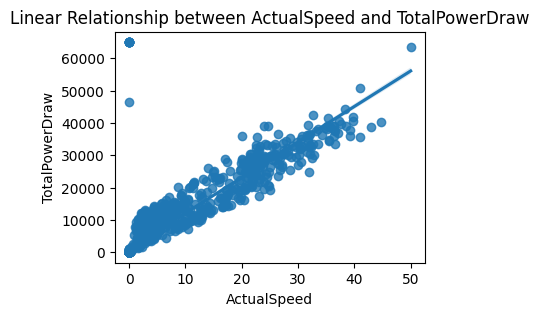

In [46]:
#check linear relationship,

def plot_linear_relationships(df_hourly_numeric, x_col, y_col, figsize=(4, 3)):
    """
    Plot the linear relationship between two columns from a DataFrame.
    
    - x_col: The name of the column to use as the x-axis.
    - y_col: The name of the column to use as the y-axis.
    - figsize: Tuple representing the figure size.
    """
    plt.figure(figsize=figsize)
    sns.regplot(x=x_col, y=y_col, data=df_hourly)
    plt.title(f'Linear Relationship between {x_col} and {y_col}')
    plt.show()

plot_linear_relationships(df_hourly_numeric, 'ThrottlePerc','TotalPowerDraw')
plot_linear_relationships(df_hourly_numeric, 'RearAxle1','TotalPowerDraw')
plot_linear_relationships(df_hourly_numeric, 'H2Weight','TotalPowerDraw')
plot_linear_relationships(df_hourly_numeric, 'MotorRPM','TotalPowerDraw')
plot_linear_relationships(df_hourly_numeric, 'MotorTorque','TotalPowerDraw')
plot_linear_relationships(df_hourly_numeric, 'MotorTemp','TotalPowerDraw')
plot_linear_relationships(df_hourly_numeric, 'BattOutputPower','TotalPowerDraw')
plot_linear_relationships(df_hourly_numeric, 'TotalFCPower','TotalPowerDraw')
plot_linear_relationships(df_hourly_numeric, 'ActualSpeed','TotalPowerDraw')

print("Plotting the linear relationship between Throttle Percentage and Total Power Draw...")
plot_linear_relationships(df_hourly_numeric, 'ThrottlePerc', 'TotalPowerDraw')

print("Plotting the linear relationship between Rear Axle 1 Load and TotalPowerDraw...")
plot_linear_relationships(df_hourly_numeric, 'RearAxle1', 'TotalPowerDraw')

print("Plotting the linear relationship between Throttle Percentage and TotalPowerDraw...")
plot_linear_relationships(df_hourly_numeric, 'H2Weight', 'TotalPowerDraw')

print("Plotting the linear relationship between Rear Axle 1 Load and TotalPowerDraw...")
plot_linear_relationships(df_hourly_numeric, 'MotorRPM', 'TotalPowerDraw')

print("Plotting the linear relationship between Throttle Percentage and TotalPowerDraw...")
plot_linear_relationships(df_hourly_numeric, 'MotorTorque', 'TotalPowerDraw')

print("Plotting the linear relationship between Rear Axle 1 Load and TotalPowerDraw...")
plot_linear_relationships(df_hourly_numeric, 'MotorTemp', 'TotalPowerDraw')

print("Plotting the linear relationship between Throttle Percentage and TotalPowerDraw..")
plot_linear_relationships(df_hourly_numeric, 'BattOutputPower', 'TotalPowerDraw')

print("Plotting the linear relationship between Rear Axle 1 Load and TotalPowerDraw...")
plot_linear_relationships(df_hourly_numeric, 'TotalFCPower', 'TotalPowerDraw')

print("Plotting the linear relationship between Rear Axle 1 Load and TotalPowerDraw...")
plot_linear_relationships(df_hourly_numeric, 'ActualSpeed', 'TotalPowerDraw')


In [47]:
# Check the type of df_hourly_numeric
if isinstance(df_hourly_numeric, pd.DataFrame):
    print("df_hourly_numeric is a pandas DataFrame.")
elif isinstance(df_hourly_numeric, np.ndarray):
    print("df_hourly_numeric is a NumPy array.")
else:
    print("df_hourly_numeric is neither a pandas DataFrame nor a NumPy array. It is a", type(df_hourly_numeric))

df_hourly_numeric is a pandas DataFrame.


In [22]:
# select the columns , drop the nans and scale the dataset
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# Assuming 'df_hourly_numeric' is your original DataFrame
# Lijst van geselecteerde variabelen
selected_columns = [
    "BatSOC", "ThrottlePerc", "RearAxle1", "H2Weight", "MotorRPM", "MotorTemp", "BattOutputPower", "TotalFCPower", 
    "MotorPowerDraw", "ActualSpeed", "TotalPowerDraw", "AirTemp"
]

# Create a DataFrame with selected columns
df_hourly_num_selected = df_hourly_numeric[selected_columns]

# Selecteer alleen de numerieke kolommen
df_hourly_num_clean = df_hourly_num_selected.select_dtypes(include=[np.number])

# Verwijder rijen met ontbrekende waarden
df_hourly_num_clean = df_hourly_num_clean.dropna()

# Assume 'TotalPowerDraw' is the dependent variable, and we remove it from X and create e new list X_columns without 'TotalPowerDraw' 
#this list will not cotain the target variable
X_columns = [col for col in selected_columns if col != 'TotalPowerDraw']

# Selecteer de onafhankelijke variabelen op basis van de geselecteerde lijst
#this gives us a set X without the target varibale
#NOTE< WE DO NOT SCALE THE TARGET VARIABLE y, this is not needed for linear regression
X = df_hourly_num_clean[X_columns]

# Selecteer de afhankelijke variabele
#rhis gives aus a set with only the target variable
y = df_hourly_num_clean['TotalPowerDraw']

# Maak een instantie van de StandardScaler
scaler = StandardScaler()

# Schaal de onafhankelijke variabelen (X)
X_scaled = scaler.fit_transform(X)

# Voeg een constante toe voor de intercept
X_scaled = sm.add_constant(X_scaled)

# Pas het OLS model toe
model = sm.OLS(y, X_scaled).fit()

# Print de samenvatting van het model
print(model.summary())

#OUTPUT We now have a scaled dataset  'X_scaled'

                            OLS Regression Results                            
Dep. Variable:         TotalPowerDraw   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     1255.
Date:                Tue, 02 Apr 2024   Prob (F-statistic):               0.00
Time:                        14:54:13   Log-Likelihood:                -25722.
No. Observations:                2654   AIC:                         5.147e+04
Df Residuals:                    2643   BIC:                         5.153e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4630.7761     76.168     60.796      0.0

In [23]:
#Check num of rows , colums and type in the X_Scaled set and y set
print(X_scaled.shape)
print(type(X_scaled))
print(y.shape)
print(type(y))

(2654, 12)
<class 'numpy.ndarray'>
(2654,)
<class 'pandas.core.series.Series'>


In [24]:
#Check that X_scaled is scaled 
print(X_scaled)
#X is scaled
y
print(y)
#y is not scaled


[[ 1.          0.57972339  1.0908756  ...  0.60686722  0.32970448
   1.38752209]
 [ 1.          0.40816042  0.63609057 ...  0.00251042 -0.17640908
   1.38752209]
 [ 1.         -0.40269353  1.15537973 ...  0.72036328  0.455761
   1.38752209]
 ...
 [ 1.         -1.97961509 -0.54962118 ... -0.45141275 -0.42898409
   0.10248001]
 [ 1.         -1.97961509 -0.54962118 ... -0.45141275 -0.42898409
   0.10248001]
 [ 1.         -1.97961509 -0.54962118 ... -0.45141275 -0.42898409
   0.10248001]]
0       13713.046695
1        9444.155245
2       12075.898738
3       40680.984837
4        5412.054734
            ...     
2662        0.000000
2663        0.000000
2664        0.000000
2665        0.000000
2666        0.000000
Name: TotalPowerDraw, Length: 2654, dtype: float64


END OF PREPROCESSING    

In [25]:
#Check higly correlated columns

from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np

# Assuming X_scaled is your scaled dataset as a NumPy array
# and X_columns is a list containing the names of the columns in X_scaled

vif_data = pd.DataFrame()
vif_data["feature"] = X_columns  # Use the column names from X_columns list
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(len(X_columns))]

print(vif_data)

#OUTCOME MotorTemp and AirTemp is inf(inite)correlated, decide not to drop any of them, since the correlation may be related to ta third factor

            feature        VIF
0            BatSOC   1.000016
1      ThrottlePerc   1.188335
2         RearAxle1  21.748949
3          H2Weight   6.745827
4          MotorRPM   3.887990
5         MotorTemp        inf
6   BattOutputPower   1.673786
7      TotalFCPower   4.622796
8    MotorPowerDraw   6.267136
9       ActualSpeed  50.630332
10          AirTemp        inf


/home/joelva/.pyenv/versions/3.11.5/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


vif=1 means perfect colleration bewteen variables, decided not to drop the inf(inite) correlated features Airtemp and Motortemp

In [26]:
#check which format the dataset is
print(type(X_scaled))
print(type(y))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


In [27]:
#Create test sets for X_scaled and the target set y
from sklearn.model_selection import train_test_split

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=42)

# Here, `X_scaled` is your feature matrix after scaling, 
# `y` is your target variable,
# `test_size=0.2` specifies that 20% of the data will be used for the test set (hence 80% for the training set),
# `random_state=42` is set for reproducibility of the results.

In [28]:
#check which format the dataset is
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [63]:
# train a linear regression model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 3: Make predictions
y_pred = model.predict(X_test)

# Step 4: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Coefficient of Determination (R^2): {r2}")

Mean Squared Error (MSE): 23789271.81917026
Coefficient of Determination (R^2): 0.7602754533003449


In [53]:
#Check the final model
 # Print the intercept of the model
print("Intercept:", model.intercept_)

# Print the coefficients of the model
print("Coefficients:", model.coef_)

# Optionally, if you want to display the feature names alongside their coefficients
# Assuming you have a list of feature names in X_columns that matches the columns in X_train
feature_names = X_columns  # Replace X_columns with your actual list of feature names if available
for feature, coef in zip(feature_names, model.coef_):
    print(f"{feature}: {coef}")

Intercept: 4586.739801107522
Coefficients: [ 0.00000000e+00 -3.38145294e+02  2.68305967e+03  1.06495350e+01
  2.12217046e+01 -1.87760808e+15 -7.29766231e+01  6.32224240e+02
  7.65546493e+02  6.04324790e+03  1.87760808e+15  1.04289209e+02]
BatSOC: 0.0
ThrottlePerc: -338.1452940680547
RearAxle1: 2683.0596650125185
H2Weight: 10.649534965778571
MotorRPM: 21.22170456565948
MotorTemp: -1877608076121390.2
BattOutputPower: -72.976623124399
TotalFCPower: 632.2242402418779
MotorPowerDraw: 765.5464933750482
ActualSpeed: 6043.2478972377485
AirTemp: 1877608076120399.8


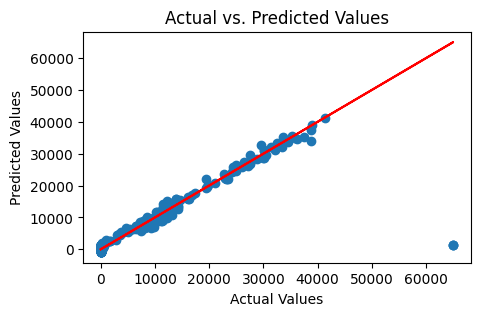

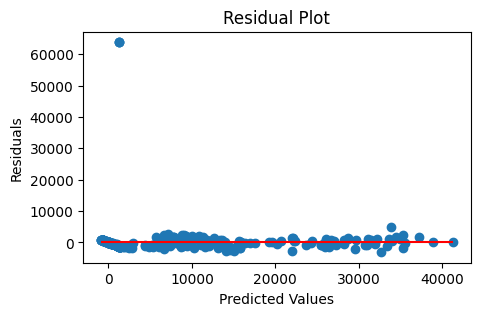

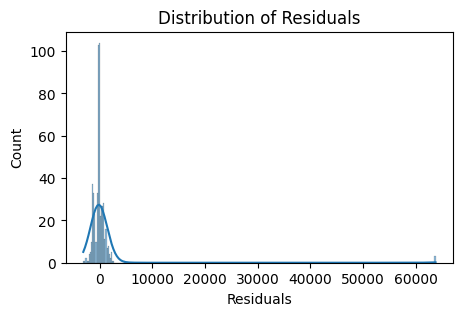

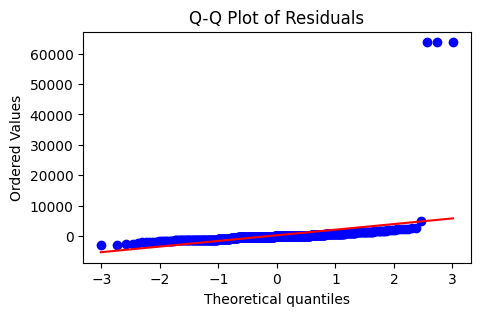

In [33]:
# residuals, predict vs actuals, qq plots for LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression



# Training a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting values for the testing set
y_pred = model.predict(X_test)

# Plotting Actual vs. Predicted Values
plt.figure(figsize=(5, 3))
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='red')  # Ideal line where predicted values equal actual values
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

# Calculating residuals
residuals = y_test - y_pred

# Plotting Residuals
plt.figure(figsize=(5, 3))
plt.scatter(y_pred, residuals)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), color='red')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Distribution of Residuals
plt.figure(figsize=(5, 3))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

# Q-Q Plot of Residuals
plt.figure(figsize=(5, 3))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

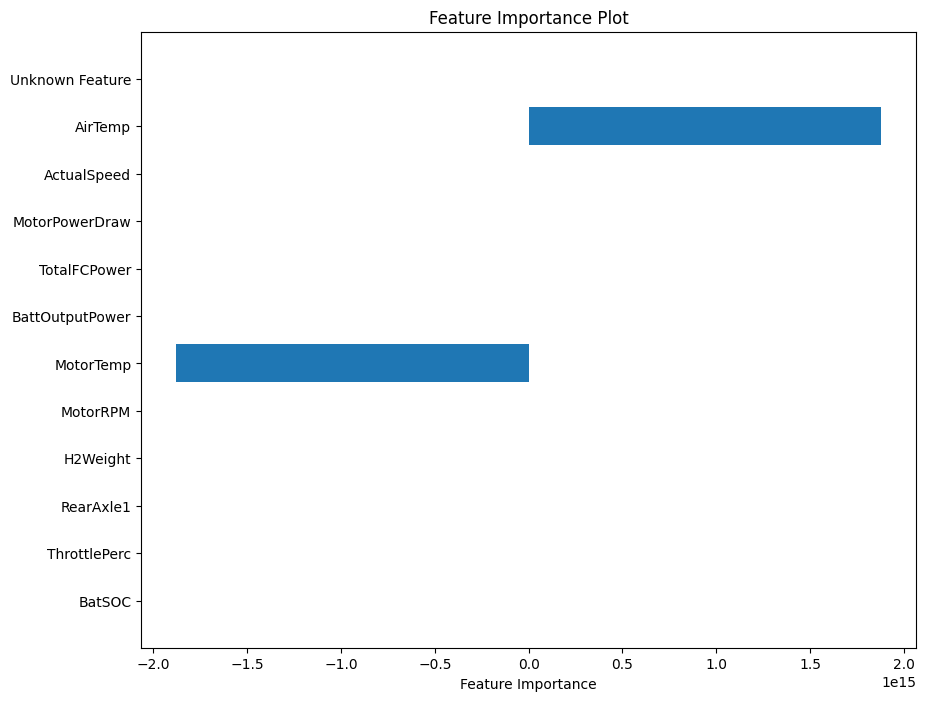

In [52]:
#check which features are most important

import matplotlib.pyplot as plt
import numpy as np

# Assuming model.coef_ has been defined with the coefficients from your linear model
feature_importance = model.coef_

# Making sure the number of feature names matches the number of coefficients
# If there are fewer names than coefficients, this could still lead to a mismatch error
if len(X_columns) >= len(feature_importance):
    adjusted_X_columns = X_columns[:len(feature_importance)]
else:
    print("Warning: Not enough feature names provided for the number of coefficients.")
    # Optionally fill in missing feature names with placeholders
    adjusted_X_columns = X_columns + ['Unknown Feature'] * (len(feature_importance) - len(X_columns))

plt.figure(figsize=(10, 8))
plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(np.arange(len(feature_importance)), adjusted_X_columns)
plt.xlabel('Feature Importance')
plt.title('Feature Importance Plot')
plt.show()

#OUTCOME, this didnt work out well

In [51]:
#Run the model on a selection of the data


def predict_total_power_draw(orig_datadf_hourly_numeric, model):
    """
    Applies a trained Linear Regression model to predict 'TotalPowerDraw' on a new dataset.

    Parameters:
 df_hourly_numeric (DataFrame or ndarray): The original dataset containing the independent variables.
    model (LinearRegression): The trained Linear Regression model.

    Returns:
    ndarray: Predicted values for 'TotalPowerDraw'.
    """

    # Check if orig_data is a DataFrame or ndarray and select features accordingly
    if isinstance(df_hourly_numeric, pd.DataFrame):
        # If orig_data is a DataFrame, ensure it contains the same features as X_train
        features = df_hourly_numeric[X_train.columns] if 'X_train' in globals() or 'X_train' in locals() else df_hourly_numeric
    elif isinstance(df_hourly_numeric, np.ndarray):
        # If orig_data is an ndarray, assume it's already structured correctly
        features = df_hourly_numeric
    else:
        raise ValueError("orig_data must be a pandas DataFrame or a numpy ndarray.")

    # Use the model to make predictions on the provided features
    predictions = model.predict(features)

    return predictions

# Example usage:
# predictions = predict_total_power_draw(orig_data, model)


HOW TO APPLY THE MODEL ON THE ORIGINAL DATASET????

In [50]:
df_hourly_numeric

,BatSOC,ThrottlePerc,RearAxle1,H2Weight,MotorRPM,MotorTorque,MotorTemp,BattOutputPower,MotorPowerDraw,TotalFCPower,...,TotalPowerDraw,AirTemp,Is_Friday,Is_Monday,Is_Saturday,Is_Sunday,Is_Thursday,Is_Tuesday,Is_Wednesday,Bin
0,87.733572,94.314217,7108.281063,6241.840427,32.226553,251.142921,40.973181,17290.052132,8695.370447,-0.051739,...,13713.046695,20.6,0,1,0,0,0,0,0,"(5.541, 5.641]"
1,81.852431,68.168056,8580.659722,6637.344792,10.728542,119.177014,50.915306,15929.268472,3729.665322,-0.049446,...,9444.155245,20.6,0,1,0,0,0,0,0,"(1.841, 1.941]"
2,54.056532,98.022640,7776.109452,5644.733940,37.581013,235.988194,56.864547,16360.531741,9627.912223,-0.054463,...,12075.898738,20.6,0,1,0,0,0,0,0,"(6.541, 6.641]"
3,46.348187,213.243523,8328.226385,6329.168194,212.520287,445.930969,72.886717,18460.976244,40360.854504,27247.517613,...,40680.984837,20.6,0,1,0,0,0,0,0,"(37.141, 37.241]"
4,24.638125,47.125000,3179.993056,2554.907153,28.368542,71.331042,70.815041,-16121.872074,4004.707189,25121.991631,...,5412.054734,20.6,0,1,0,0,0,0,0,"(4.941, 5.041]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2662,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.059583,...,0.000000,11.4,0,0,1,0,0,0,0,"(-0.0603, 0.0407]"
2663,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.060000,...,0.000000,11.4,0,0,1,0,0,0,0,"(-0.0603, 0.0407]"
2664,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.060000,...,0.000000,11.4,0,0,1,0,0,0,0,"(-0.0603, 0.0407]"
2665,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.060000,...,0.000000,11.4,0,0,1,0,0,0,0,"(-0.0603, 0.0407]"


In [59]:
import pandas as pd

# Assuming 'df_hourly_numeric', 'model', and 'X_train' are already defined

feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else ["BatSOC", "ThrottlePerc", "RearAxle1", "H2Weight", "MotorRPM", "MotorTemp", "BattOutputPower", "TotalFCPower", "MotorPowerDraw", "ActualSpeed", "TotalPowerDraw", "AirTemp"]

# Selecting the relevant features from the new dataframe
X_new = df_hourly_numeric[feature_names]

# Drop the nans
X_new_cleaned = X_new.dropna()

# Making predictions
y_new_pred = model.predict(X_new_cleaned)

# Insert predictions into the cleaned DataFrame
X_new_cleaned['Predicted_TotalPowerDraw'] = y_new_pred

# If you want to merge the predictions back into the original DataFrame, use an identifier or index to merge on
# Assuming df_hourly_numeric and X_new_cleaned share a common index or identifier that survived the dropna
# For simplicity, if the index is maintained, you can reindex or merge based on the index

df_hourly_numeric_with_predictions = df_hourly_numeric.merge(X_new_cleaned[['Predicted_TotalPowerDraw']], how='left', left_index=True, right_index=True)

# Now df_hourly_numeric_with_predictions contains the original data plus a new column with predicted values where available, NaNs elsewhere


/home/joelva/.pyenv/versions/3.11.5/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/tmp/ipykernel_143094/3341869218.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new_cleaned['Predicted_TotalPowerDraw'] = y_new_pred


In [60]:
df_hourly_numeric_with_predictions

,BatSOC,ThrottlePerc,RearAxle1,H2Weight,MotorRPM,MotorTorque,MotorTemp,BattOutputPower,MotorPowerDraw,TotalFCPower,...,AirTemp,Is_Friday,Is_Monday,Is_Saturday,Is_Sunday,Is_Thursday,Is_Tuesday,Is_Wednesday,Bin,Predicted_TotalPowerDraw
0,87.733572,94.314217,7108.281063,6241.840427,32.226553,251.142921,40.973181,17290.052132,8695.370447,-0.051739,...,20.6,0,1,0,0,0,0,0,"(5.541, 5.641]",2.567080e+19
1,81.852431,68.168056,8580.659722,6637.344792,10.728542,119.177014,50.915306,15929.268472,3729.665322,-0.049446,...,20.6,0,1,0,0,0,0,0,"(1.841, 1.941]",1.763682e+19
2,54.056532,98.022640,7776.109452,5644.733940,37.581013,235.988194,56.864547,16360.531741,9627.912223,-0.054463,...,20.6,0,1,0,0,0,0,0,"(6.541, 6.641]",2.256704e+19
3,46.348187,213.243523,8328.226385,6329.168194,212.520287,445.930969,72.886717,18460.976244,40360.854504,27247.517613,...,20.6,0,1,0,0,0,0,0,"(37.141, 37.241]",7.624609e+19
4,24.638125,47.125000,3179.993056,2554.907153,28.368542,71.331042,70.815041,-16121.872074,4004.707189,25121.991631,...,20.6,0,1,0,0,0,0,0,"(4.941, 5.041]",1.002875e+19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2662,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.059583,...,11.4,0,0,1,0,0,0,0,"(-0.0603, 0.0407]",-3.755216e+16
2663,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.060000,...,11.4,0,0,1,0,0,0,0,"(-0.0603, 0.0407]",-3.755216e+16
2664,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.060000,...,11.4,0,0,1,0,0,0,0,"(-0.0603, 0.0407]",-3.755216e+16
2665,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.060000,...,11.4,0,0,1,0,0,0,0,"(-0.0603, 0.0407]",-3.755216e+16


In [61]:
selected_columns_TPD = df_hourly_numeric_with_predictions[['TotalPowerDraw', 'Predicted_TotalPowerDraw']]

In [62]:
selected_columns_TPD

,TotalPowerDraw,Predicted_TotalPowerDraw
0,13713.046695,2.567080e+19
1,9444.155245,1.763682e+19
2,12075.898738,2.256704e+19
3,40680.984837,7.624609e+19
4,5412.054734,1.002875e+19
...,...,...
2662,0.000000,-3.755216e+16
2663,0.000000,-3.755216e+16
2664,0.000000,-3.755216e+16
2665,0.000000,-3.755216e+16
